In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [35]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=200, n_features=2, 
                           centers=3, cluster_std=2.0, random_state=100)
x = data[:,0]
y = data[:,1]

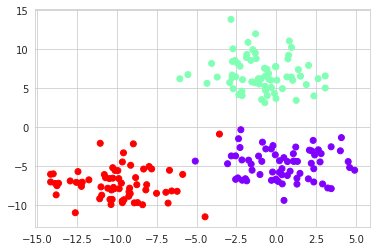

In [36]:
sns.set_style("whitegrid")
plt.scatter(x , y, c = labels, cmap='rainbow')

In [37]:
import numpy as np
#from scipy.spatial.distance import cdist

def Initilize_centroids(x_inp, n_centroids, seed =100):
    '''
    Initilize centroids by randomly selecting from data range.
    
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             n_centroind  - number of components, means or centroids.
             seed - random seed, integer value
    Output:  init_means - numpy ndarray of dimension (n_centroids, n_features)
    '''
    #set rand.seed
    np.random.seed(seed)
    x_max, x_min  = x_inp.max(axis=0), x_inp.min(axis=0)
    n_features = x_inp.shape[1]
    init_means = np.random.rand(n_centroids, n_features) * (x_max - x_min) + x_min
    return init_means
    
    
    

def distance(x_inp, means, n_centroids):
    '''
    Performs Expectation step given input data and returns expectation values.   
    
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             means - centroid positions, numpy ndarray of dimension (n_centroids, n_features)   
             n_centroind  - number of components( means or centroids )
    Output:  x_expect  - numpy ndarray of dimension (n_samples, n_centroids)
    '''
    
    dist = cdist(x_inp, means, 'euclidean')
    
    #or
    #for i in range(len(means)):
    #    dist = x_inp - means[i]
    #    dist = dist*dist
        
    return dist


In [38]:
means = Initilize_centroids(x_inp=data, n_centroids=3)
d = distance(x_inp=data, means=means, n_centroids=3)

In [51]:
labels = d.argmin(axis=1) # very elegant way of labeling!


In [ ]:
def MoveCent(x_inp, x_expect):
    '''
    Performs Maximization step given input data and expectation values, then
    and returns centroid positions.   
    
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             x_expect  - numpy ndarray of dimension (n_samples, n_centroids)
    Output:  means  - numpy ndarray of dimension (n_centroids, n_features)   
    '''
    
    #Maximization Step
    means = np.dot(x_inp.transpose(),x_expect)
    return means.T


def train_EM(x_inp, n_centroids, n_steps):
    '''
    Here we simulate EM by iterating up to n_step and return finale centroid positions.   
    
    -----------
    
    Input:   x_inp - numpy ndarray of dimension (n_samples, n_features)
             n_centroind  - number of components( means or centroids )
    Output:  means  - numpy ndarray of dimension (n_centroids, n_features)
             labels - clustering labels based on finale expectation value comparison  
    '''
    
    seed = 101
    means = Initilize_centroids(x_inp, n_centroids, seed)   
        
    for i in range(steps):
        x_expect = Estep(data, means, n_centroids)
        means = Mstep(data, x_expect)
        
    labels = x_expect.argmax(axis=1) # very elegant way of labeling!
    return means, labels